In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# data.csv
# 58, 14, 23, 70, 297, 112, 237, 475, 279, 738, 134, 4, 120, 90, 401, 13, 405, 52, 1007, 19, 77, 12, 32, 259, 46, 518, 52, 0, 172, 512, 13, 1, 119, 128, 310, 131, 235, 284, 79, 16, 69, 18, 305, 461, 12, 93, 85, 348, 48, 146, 121, 39, 126, 415, 419, 28, 39, 516, 65, 2, 36, 192, 34, 21, 346, 622, 617, 59, 330, 580, 80, 6, 960, 234, 52, 438, 170, 75, 92, 340, 403, 177, 113, 55, 87, 51, 165, 58, 1271, 4, 51, 300, 48, 56, 112, 139, 22, 226, 127, 186
# data_example.csv
# 644, 1216, 2352, 1386, 1280, 903, 607, 2068, 4467, 835, 313, 555, 307, 508, 1386, 2895, 583, 292, 5159, 1107, 181, 18, 1247, 125, 1452, 4211, 890, 659, 1602, 2425, 214, 68, 21, 1762, 1118, 45, 1803, 1187, 2154, 19, 1122, 278, 1622, 702, 1396, 694, 45, 1739, 3483, 1334, 1852, 96, 173, 7443, 901, 2222, 4465, 18, 1968, 1426, 1424, 1146, 435, 1390, 246, 578, 281, 455, 609, 854, 436, 1762, 444, 466, 1934, 681, 4539, 164, 295, 1644, 711, 245, 740, 18, 474, 623, 462, 605, 187, 106, 793, 92, 296, 226, 63, 246, 446, 2234, 2491, 315

[INFO] Average T = 198.34
[INFO] Hist val = [0.004406, 0.00118, 0.000865, 0.000629, 0.000472, 7.9e-05, 0.0, 0.000157, 0.0, 7.9e-05]
[INFO] Hist bin = [0.0, 127.1, 254.2, 381.3, 508.4, 635.5, 762.6, 889.7, 1016.8, 1143.9, 1271.0]
[INFO] Prob = [1.   0.44 0.29 0.18 0.1  0.04 0.03 0.03 0.01 0.01 0.  ]
[INFO] T = 29.50535714285714
[INFO] h = 127.1
[INFO] P1 = 0.043162863886703415
[INFO] P2 = 0.010000000000000016, idx2 = 8
[INFO] Hist[idx] = 0.0
[INFO] L = 0.0


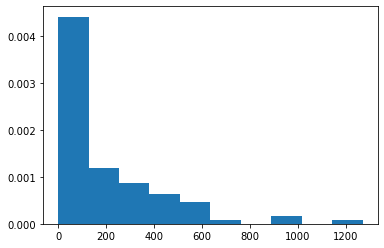

In [3]:
def count_P(hist, t):
    P = 1
    width = hist[1][1]
    idx = 0
    for f, h in zip(hist[0], hist[1]):
        if h > t:
            #print(f'[INFO] LValue:h = {round(h)};  P = {round(P, 6)}; substract = {f} * {abs(t - h)}')
            P -= f * abs(t - h)
            break
        #print(f'[INFO] Value: h = {round(h)};  P = {round(P, 6)}; substract = {f} * {width}')
        P -= width*f 
        idx += 1
    return P, idx

def count_lambda(hist, P, idx):
    _lambda = hist[0][idx]/P
    return _lambda
    
def get_average(data):
    average = data.mean()
    return average

def read_file(filename):
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    data = np.array([int(x) for x in data[0]], dtype="int32")
    return data

def get_hist(data, bins=10):
    hist = plt.hist(data, bins=bins, density=True)
    return hist

def get_prob(hist):
    prob = [1]
    value = 1
    h = hist[1][1]
    for f in hist[0]:
        value = round(value - f * h, 5)
        prob.append(value)
    return np.array(prob)        

def count_T(bins_equal):
    d_12 = (0.9 - y)/(0.9 - 0.44)
    T_087 = 1 + h * d_12

def make_lab(filename, y, t1, t2):
    data = read_file(filename)
    hist = get_hist(data, bins=np.arange(0, max(data)+1, max(data)/10))
    average = get_average(data)
    prob = get_prob(hist)
    print(f'[INFO] Average T = {average}')
    print(f'[INFO] Hist val = {[round(i, 6) for i in hist[0]]}')
    print(f'[INFO] Hist bin = {[round(i, 5) for i in hist[1]]}')
    print(f'[INFO] Prob = {prob}')
    #bins_equal = np.array(np.arange(0, 1.1, 0.1)[::-1])
    idx = None
    for i, val in enumerate(prob):
        if val < y:
            idx = i - 1
            break
    d = (prob[idx] - y)/(prob[idx] - prob[idx+1])
    h = hist[1][1]
    T = hist[1][idx] + h * d
    print(f'[INFO] T = {T}')
    print(f'[INFO] h = {h}')
    P1, idx1 = count_P(hist, t1)
    P2, idx2 = count_P(hist, t2)
    print(f'[INFO] P1 = {P1}')
    print(f'[INFO] P2 = {P2}, idx2 = {idx2}')
    print(f'[INFO] Hist[idx] = {hist[0][idx2]}')
    _lambda = count_lambda(hist, P2, idx2)
    print(f'[INFO] L = {_lambda}')
 
filename = "data.csv"
make_lab(filename, 0.87, 388, 1012)
#make_lab(filename, 0.9, 2000, 2000)